In [13]:
import os, cv2, matplotlib.pyplot as plt, numpy as np
root_dir = os.getcwd()

**CREATING DATASET DIRECTORY**

In [14]:
# creating datasets directory
datasets_path = os.path.join(root_dir, 'datasets','id_cards')

images_labels_list = ['images', 'labels']
train_val_list = ['train', 'val']

if os.path.isdir(datasets_path):
    print('directory already exists')
else:
    for item in images_labels_list:
        for dir in train_val_list:
            os.makedirs(os.path.join(root_dir, datasets_path, item, dir))


train_img_path = os.path.join('datasets', 'id_cards', 'images', 'train')
train_lbl_path = os.path.join('datasets', 'id_cards', 'labels', 'train')

val_img_path = os.path.join('datasets', 'id_cards', 'images', 'val')
val_lbl_path = os.path.join('datasets', 'id_cards', 'labels', 'val')


directory already exists


**EXTRACTING IMAGES from images.zip**

In [15]:
from zipfile import ZipFile

file_name = "images.zip"

with ZipFile(file_name, 'r') as zip:

    zip.extractall()
    print('Done!')

Done!


**ADDING ORIGINAL IMAGES TO TRAIN DATASET**

In [16]:
from custom_modules.fill_dataset_imgs import fill_dataset_imgs
fill_dataset_imgs(train_img_path, val_img_path)

number of val images: 180
number of train images: 1560


ADDING 45degrees ROTATED IMAGES

In [17]:
from custom_modules.add_ro_imgs import add_ro_imgs
add_ro_imgs(train_img_path, val_img_path)

number of train images :1560
number of val images :180


**READING JSON LABELS AND ADDING THEM TO LABELS DIRECTORY**


In [18]:
from custom_modules.handle_json_labels import handle_json_labels

# attempted labeling images 2 times, so we have two sources of labels
keypoint_labels = 'keypoint_labels.json'
keypoint_labels_2 = 'keypoint_labels_2.json'

# creates labels directory and adds labels
handle_json_labels(keypoint_labels, keypoint_labels_2)

number of original labels: 177


FILTERING IMAGES WITH NO DETECTIONS

In [19]:
# no detection images
from glob import glob
for img_path in glob(os.path.join('labels', '120_*')):
    print(img_path)
    os.remove(img_path)

labels\120_jpeg.rf.a8081a3db6a0128867e2bbbf76ac5f32.txt
labels\120_jpeg.rf.afd3d92735ef35184edc8c68e0a9413c.txt
labels\120_jpeg.rf.e1a0b6ec9a7821c13eb0f91f1b08d101.txt


In [20]:
from custom_modules.fill_dataset_lbls import fill_dataset_lbls

fill_dataset_lbls(train_lbl_path, val_lbl_path)

number of train labels :1560
number of train labels :180


ADDING 45degrees ROTATED LABELS

In [21]:
from custom_modules.add_ro_lbls import add_ro_lbls
add_ro_lbls(train_lbl_path, val_lbl_path, train_img_path, val_img_path)

number of train labels :1560
number of val labels :180


Test Section below
===============================

ro_hr_135_jpg.rf.3fdb5c2a543c5555345230ea0d09f632.jpg
ro_hr_135_jpg.rf.3fdb5c2a543c5555345230ea0d09f632.txt
0 0.15308 0.59281 0.17296 0.5464 0.10446 0.49116 0.08347 0.53867
0 0.21495 0.51768 0.26577 0.55524 0.30555 0.51105 0.25141 0.47017
0 0.41051 0.44365 0.44807 0.41714 0.40388 0.37515 0.36521 0.40498
0 0.4768 0.18291 0.52099 0.23152 0.53315 0.20169 0.49337 0.1575
0 0.57292 0.14424 0.52541 0.09231 0.54972 0.07242 0.59391 0.13429



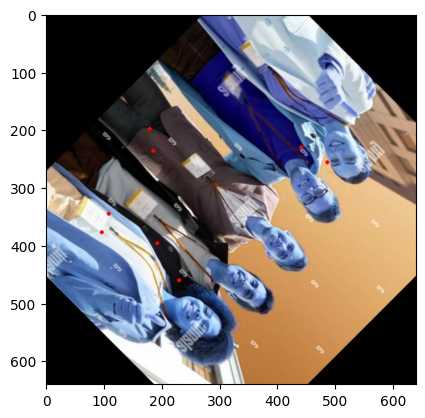

In [22]:
for img_path in os.listdir(train_img_path)[1100:1101]:
    print(img_path)
    print('=======================')
    for lbl_path in os.listdir(train_lbl_path):

        if img_path.split('.')[-2] == lbl_path.split('.')[-2] and lbl_path[:5] == img_path[:5]:
            print(lbl_path)

            f = open(os.path.join(train_lbl_path, lbl_path))
            print(f.read())
            f.close()
            img = cv2.imread(os.path.join(train_img_path, img_path))

            cv2.circle(img, (int((0.15) * 640),int(0.59 * 640)), 2, (255, 0, 0), 2)
            cv2.circle(img, (int(0.17 * 640), int(0.54 * 640)), 2, (255, 0, 0), 2)
            cv2.circle(img, (int(0.36 * 640), int(0.72 * 640)), 2, (255, 0, 0), 2)
            cv2.circle(img, (int(0.76 * 640), int(0.4 * 640)), 2, (255, 0, 0), 2)


            cv2.circle(img, (int((0.28) * 640), int((0.31) * 640)), 2, (255, 0, 0), 2)
            cv2.circle(img, (int((0.29)* 640), int((0.37) * 640)), 2, (255, 0, 0), 2)
            cv2.circle(img, (int((1-0.7) * 640), int((1 - 0.38) * 640)), 2, (255, 0, 0), 2)
            cv2.circle(img, (int(0.69 * 640), int(0.36 * 640)), 2, (255, 0, 0), 2)

            plt.imshow(img)


    break

In [23]:
print(len(os.listdir(train_img_path)), len(os.listdir(train_lbl_path)))
print(len(os.listdir(val_img_path)), len(os.listdir(val_lbl_path)))

1560 1560
180 180


In [14]:
!pip install ultralytics
import ultralytics
ultralytics.checks()

In [ ]:
from ultralytics import YOLO
model_obb_pretraind = YOLO('yolov8n-obb.pt')

In [ ]:
training_res = model_obb_pretraind.train(data="config.yaml", epochs=100, imgsz=640, batch=64)


Ultralytics YOLOv8.2.60 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=obb, mode=train, model=/content/yolov8n-obb.pt, data=config.yaml, epochs=100, time=None, patience=100, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_box

100%|██████████| 6.25M/6.25M [00:00<00:00, 125MB/s]


AMP: checks passed ✅


train: Scanning /content/datasets/id_cards/labels/train.cache... 1480 images, 80 backgrounds, 26 corrupt: 100%|██████████| 1560/1560 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/datasets/id_cards/images/train/ro_50_jpeg.rf.03a56f985001452fd0655fe2dda6e454.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.3965      1.3954]
train: WARNING ⚠️ /content/datasets/id_cards/images/train/ro_50_jpeg.rf.cccb50adeb502e3d9c22c2407fc051ff.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.3976      1.3855]
train: WARNING ⚠️ /content/datasets/id_cards/images/train/ro_78_jpeg.rf.387754529ae021deba6ae58788966f64.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0143      1.0066]
train: WARNING ⚠️ /content/datasets/id_cards/images/train/ro_78_jpeg.rf.6acad7128dbe7a1245e4ee1767fe5938.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0143      1.0066]
train: WARNING ⚠️ /content/datasets/id_cards/images/train/ro_78_jpeg.rf.a49ab4ad21a427a65db838cf6e233e24.jpg: ignoring corrupt image/label: non-normalized or ou


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/datasets/id_cards/labels/val.cache... 100 images, 80 backgrounds, 0 corrupt: 100%|██████████| 180/180 [00:00<?, ?it/s]


Plotting labels to runs/obb/train8/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 63 weight(decay=0.0), 73 weight(decay=0.0005), 72 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/obb/train8
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100       9.7G      1.326      2.809      1.942        171        640: 100%|██████████| 24/24 [00:35<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.12s/it]

                   all        180        116      0.272      0.776      0.282      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      8.79G     0.8674      1.127      1.605        164        640: 100%|██████████| 24/24 [00:36<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.02it/s]

                   all        180        116      0.429      0.797      0.466      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      8.78G     0.8438     0.8638      1.611        134        640: 100%|██████████| 24/24 [00:32<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.11s/it]

                   all        180        116       0.47      0.819      0.536      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      8.82G     0.8387     0.7975      1.623        139        640: 100%|██████████| 24/24 [00:31<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.77s/it]

                   all        180        116      0.336      0.488      0.292      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      8.79G     0.8527     0.8044      1.608        156        640: 100%|██████████| 24/24 [00:29<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.72s/it]

                   all        180        116      0.411      0.388      0.259      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      8.79G     0.8023     0.7227      1.575        171        640: 100%|██████████| 24/24 [00:29<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.65s/it]

                   all        180        116      0.415       0.69       0.42      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      8.76G     0.7797     0.6781      1.595        129        640: 100%|██████████| 24/24 [00:29<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.70s/it]

                   all        180        116      0.563      0.644      0.594      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      8.78G     0.7557     0.6713      1.582        152        640: 100%|██████████| 24/24 [00:32<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.01s/it]

                   all        180        116       0.54      0.871      0.585       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      8.83G     0.7171     0.6448      1.555        147        640: 100%|██████████| 24/24 [00:32<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.76s/it]

                   all        180        116      0.546      0.623      0.573      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      8.76G     0.7013     0.6281      1.542        152        640: 100%|██████████| 24/24 [00:32<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.01s/it]

                   all        180        116      0.471      0.931      0.588      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      8.83G     0.6957     0.5917      1.533        138        640: 100%|██████████| 24/24 [00:32<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.01it/s]

                   all        180        116      0.591      0.784      0.753      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      8.82G      0.678     0.5871      1.514        141        640: 100%|██████████| 24/24 [00:32<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.06it/s]

                   all        180        116       0.64      0.828      0.787      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      8.76G     0.6635     0.5761      1.525        135        640: 100%|██████████| 24/24 [00:37<00:00,  1.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.07it/s]

                   all        180        116      0.558      0.905      0.668      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      8.78G     0.6533     0.5607      1.525        136        640: 100%|██████████| 24/24 [00:31<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.06s/it]

                   all        180        116       0.54      0.912      0.649      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      8.78G      0.654     0.5656      1.524        139        640: 100%|██████████| 24/24 [00:36<00:00,  1.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.00it/s]

                   all        180        116       0.67      0.724      0.754      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      8.78G     0.6293     0.5573      1.509        149        640: 100%|██████████| 24/24 [00:31<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]

                   all        180        116      0.504      0.888      0.668      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      8.95G      0.617     0.5339      1.482        161        640: 100%|██████████| 24/24 [00:29<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.75s/it]

                   all        180        116      0.575      0.875      0.776       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      8.78G     0.6034     0.5109      1.465        154        640: 100%|██████████| 24/24 [00:28<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.82s/it]

                   all        180        116      0.542      0.966       0.81      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      8.78G     0.5965     0.5223      1.459        151        640: 100%|██████████| 24/24 [00:32<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.78s/it]

                   all        180        116      0.512      0.914      0.631      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      8.79G      0.602     0.5185      1.474        140        640: 100%|██████████| 24/24 [00:28<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.60s/it]

                   all        180        116      0.507      0.905      0.706      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      8.77G      0.581     0.5087       1.48        127        640: 100%|██████████| 24/24 [00:32<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.82s/it]

                   all        180        116      0.509      0.974      0.669      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      8.77G     0.5819     0.4927      1.458        176        640: 100%|██████████| 24/24 [00:28<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.64s/it]

                   all        180        116      0.663      0.871      0.862      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      8.83G     0.5658     0.5192      1.476        153        640: 100%|██████████| 24/24 [00:28<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.11s/it]

                   all        180        116      0.799      0.856      0.885      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      8.77G     0.5663      0.497      1.425        157        640: 100%|██████████| 24/24 [00:34<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.02s/it]

                   all        180        116      0.584      0.836      0.671      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      8.82G     0.5546     0.4933      1.429        135        640: 100%|██████████| 24/24 [00:32<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.00s/it]

                   all        180        116      0.529      0.914      0.786      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      8.79G     0.5547     0.4732      1.415        184        640: 100%|██████████| 24/24 [00:33<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.31s/it]

                   all        180        116       0.67      0.793      0.847       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      8.79G     0.5536     0.4826      1.427        116        640: 100%|██████████| 24/24 [00:29<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.09s/it]

                   all        180        116      0.549      0.948      0.792      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      8.77G     0.5501     0.4707      1.434        155        640: 100%|██████████| 24/24 [00:31<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.18s/it]

                   all        180        116      0.501          1      0.656      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      8.78G     0.5285     0.4523      1.419        139        640: 100%|██████████| 24/24 [00:29<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.67s/it]

                   all        180        116      0.647      0.823      0.865      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      8.79G     0.5186     0.4515      1.409        168        640: 100%|██████████| 24/24 [00:31<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.72s/it]

                   all        180        116      0.727      0.781      0.867      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      8.78G     0.5242     0.4637        1.4        117        640: 100%|██████████| 24/24 [00:28<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.72s/it]

                   all        180        116      0.807      0.831      0.918      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      8.79G     0.5123     0.4493      1.394        132        640: 100%|██████████| 24/24 [00:33<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.17s/it]

                   all        180        116      0.682      0.879       0.84      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      8.77G     0.5251     0.4732      1.397        155        640: 100%|██████████| 24/24 [00:30<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.04it/s]

                   all        180        116      0.532      0.966      0.691      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      8.79G     0.4979     0.4532        1.4        141        640: 100%|██████████| 24/24 [00:31<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.02it/s]

                   all        180        116       0.68      0.888      0.883       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      8.78G     0.4989     0.4293       1.38        166        640: 100%|██████████| 24/24 [00:31<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.08it/s]

                   all        180        116      0.512      0.948      0.796      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      8.78G     0.4997     0.4418      1.393        143        640: 100%|██████████| 24/24 [00:35<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.01it/s]

                   all        180        116      0.576      0.914      0.797      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      8.82G     0.4972     0.4358      1.367        107        640: 100%|██████████| 24/24 [00:31<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.02s/it]

                   all        180        116      0.587       0.69       0.82      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      8.78G     0.4971     0.4397      1.382        154        640: 100%|██████████| 24/24 [00:35<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.07s/it]

                   all        180        116      0.617       0.82      0.877      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      8.78G     0.4853      0.433      1.382        157        640: 100%|██████████| 24/24 [00:32<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.02it/s]

                   all        180        116      0.631      0.828      0.888       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      8.79G     0.4957     0.4361      1.374        144        640: 100%|██████████| 24/24 [00:31<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.16s/it]

                   all        180        116      0.505      0.996      0.792       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      8.83G     0.4838     0.4283      1.354        122        640: 100%|██████████| 24/24 [00:30<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.76s/it]

                   all        180        116      0.737      0.828      0.881      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      8.79G     0.4816     0.4273      1.379        131        640: 100%|██████████| 24/24 [00:31<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.58s/it]

                   all        180        116      0.584      0.983      0.828      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      8.82G     0.4673     0.4195       1.35        147        640: 100%|██████████| 24/24 [00:29<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.85s/it]

                   all        180        116      0.732      0.862      0.918      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      8.76G     0.4744     0.4195      1.373        139        640: 100%|██████████| 24/24 [00:32<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.55s/it]

                   all        180        116      0.532      0.983      0.819      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      8.83G     0.4726     0.4225      1.335        153        640: 100%|██████████| 24/24 [00:29<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.84s/it]

                   all        180        116      0.707      0.707      0.864      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      8.78G     0.4675     0.4162      1.374        143        640: 100%|██████████| 24/24 [00:27<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.75s/it]

                   all        180        116      0.582      0.804      0.842      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      8.77G     0.4598     0.4108      1.339        140        640: 100%|██████████| 24/24 [00:32<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.75s/it]

                   all        180        116      0.854      0.716      0.877      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      8.83G     0.4613     0.4015      1.327        131        640: 100%|██████████| 24/24 [00:28<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.21s/it]

                   all        180        116      0.517      0.983      0.821       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      8.75G     0.4642     0.3987      1.338        133        640: 100%|██████████| 24/24 [00:35<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.65s/it]

                   all        180        116       0.64      0.784      0.835      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      8.77G     0.4548     0.4111      1.337        132        640: 100%|██████████| 24/24 [00:28<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.12s/it]

                   all        180        116      0.536      0.966      0.721      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      8.78G     0.4513     0.3975      1.336        174        640: 100%|██████████| 24/24 [00:29<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.02s/it]

                   all        180        116      0.825       0.75       0.87      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      8.78G     0.4448      0.404      1.324        139        640: 100%|██████████| 24/24 [00:30<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.04it/s]

                   all        180        116      0.528      0.983      0.809      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      8.79G     0.4583     0.4126      1.326        126        640: 100%|██████████| 24/24 [00:33<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.01it/s]

                   all        180        116      0.606      0.897       0.83      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      8.76G     0.4389     0.3906      1.324        157        640: 100%|██████████| 24/24 [00:31<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.01s/it]

                   all        180        116      0.693      0.888      0.893      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      8.78G     0.4474     0.3995      1.311        146        640: 100%|██████████| 24/24 [00:33<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]

                   all        180        116      0.692      0.776      0.859       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      8.78G     0.4317     0.3926      1.318        145        640: 100%|██████████| 24/24 [00:30<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.67s/it]

                   all        180        116      0.698       0.75      0.884      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      8.79G     0.4311     0.3972      1.305        227        640: 100%|██████████| 24/24 [00:28<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.73s/it]

                   all        180        116      0.743      0.716       0.85      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      8.75G     0.4228     0.3813      1.308        125        640: 100%|██████████| 24/24 [00:28<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.56s/it]

                   all        180        116      0.573      0.912      0.822      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      8.78G      0.421      0.375       1.28        171        640: 100%|██████████| 24/24 [00:31<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.04it/s]

                   all        180        116      0.625       0.75      0.864      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      8.78G     0.4176     0.3776      1.294        160        640: 100%|██████████| 24/24 [00:31<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.07s/it]

                   all        180        116      0.582      0.974      0.817       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      8.79G      0.423     0.3781      1.319        146        640: 100%|██████████| 24/24 [00:35<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.07it/s]

                   all        180        116      0.529          1      0.781      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      8.76G     0.4146     0.3794      1.302        155        640: 100%|██████████| 24/24 [00:31<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.18s/it]

                   all        180        116       0.74      0.882      0.909      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      8.78G     0.4098     0.3657      1.296        124        640: 100%|██████████| 24/24 [00:30<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.63s/it]

                   all        180        116        0.6      0.828      0.852      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      8.79G     0.4134     0.3694      1.319        119        640: 100%|██████████| 24/24 [00:28<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.69s/it]

                   all        180        116      0.648      0.713      0.831      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      8.83G     0.4059     0.3746      1.283        142        640: 100%|██████████| 24/24 [00:30<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.69s/it]

                   all        180        116      0.608      0.749      0.858      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      8.86G     0.4057      0.381      1.295        185        640: 100%|██████████| 24/24 [00:30<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.68s/it]

                   all        180        116      0.579      0.887      0.852      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      8.78G     0.4011      0.361      1.295        148        640: 100%|██████████| 24/24 [00:32<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.03s/it]

                   all        180        116      0.613      0.845      0.873      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      8.78G     0.4125     0.3743      1.291        164        640: 100%|██████████| 24/24 [00:31<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.02s/it]

                   all        180        116      0.568      0.974      0.851      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      8.84G     0.4079     0.3728      1.317        135        640: 100%|██████████| 24/24 [00:32<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.05it/s]

                   all        180        116      0.529          1      0.812       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      8.78G      0.405     0.3681      1.299        137        640: 100%|██████████| 24/24 [00:32<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.10s/it]

                   all        180        116      0.597      0.881      0.788      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      8.84G     0.3915     0.3599      1.274        145        640: 100%|██████████| 24/24 [00:33<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.52s/it]

                   all        180        116       0.61      0.948      0.867      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      8.76G     0.3961     0.3694      1.273        157        640: 100%|██████████| 24/24 [00:29<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.77s/it]

                   all        180        116      0.601      0.819      0.877      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      8.79G     0.3984     0.3667      1.312        137        640: 100%|██████████| 24/24 [00:31<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.25s/it]

                   all        180        116      0.655       0.94      0.897      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      8.79G     0.3983     0.3746      1.301        137        640: 100%|██████████| 24/24 [00:29<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.00s/it]

                   all        180        116      0.556      0.905      0.803      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      8.78G     0.3818     0.3472      1.277        154        640: 100%|██████████| 24/24 [00:30<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.00it/s]

                   all        180        116      0.537      0.942      0.832      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      8.79G     0.3799     0.3438      1.274        161        640: 100%|██████████| 24/24 [00:32<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.03s/it]

                   all        180        116      0.574      0.922      0.848      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      8.91G     0.3765     0.3492      1.285        130        640: 100%|██████████| 24/24 [00:35<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.02s/it]

                   all        180        116      0.701      0.776      0.867      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      8.77G     0.3809     0.3551      1.276        146        640: 100%|██████████| 24/24 [00:29<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]

                   all        180        116      0.553      0.931      0.825      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      8.84G     0.3757     0.3567      1.279        143        640: 100%|██████████| 24/24 [00:31<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.76s/it]

                   all        180        116      0.658      0.814      0.867      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      8.83G     0.3735     0.3442      1.253        141        640: 100%|██████████| 24/24 [00:27<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.68s/it]

                   all        180        116      0.695       0.81      0.894      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      8.78G     0.3673       0.34      1.259        163        640: 100%|██████████| 24/24 [00:27<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.54s/it]

                   all        180        116      0.566      0.966      0.816      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      8.78G     0.3714     0.3466      1.267        160        640: 100%|██████████| 24/24 [00:28<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.64s/it]

                   all        180        116       0.68      0.793      0.868       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      8.83G     0.3689     0.3449      1.257        146        640: 100%|██████████| 24/24 [00:32<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.73s/it]

                   all        180        116      0.651      0.767      0.862      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      8.84G     0.3673     0.3455       1.27        115        640: 100%|██████████| 24/24 [00:28<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.63s/it]

                   all        180        116      0.662      0.793      0.883      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      8.78G     0.3548     0.3388      1.254        119        640: 100%|██████████| 24/24 [00:32<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.70s/it]

                   all        180        116      0.638      0.819      0.881      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      8.73G     0.3585     0.3405       1.25        167        640: 100%|██████████| 24/24 [00:29<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.23s/it]

                   all        180        116       0.63      0.871      0.898      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      8.78G     0.3465     0.3243      1.247        163        640: 100%|██████████| 24/24 [00:29<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.01it/s]

                   all        180        116      0.636      0.888      0.875      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      8.79G     0.3598     0.3387      1.264        121        640: 100%|██████████| 24/24 [00:29<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.15s/it]

                   all        180        116      0.635      0.819      0.895      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      8.82G     0.3594     0.3374      1.247        159        640: 100%|██████████| 24/24 [00:33<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.00s/it]

                   all        180        116      0.711      0.879       0.92      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      8.77G     0.3527     0.3278      1.254        153        640: 100%|██████████| 24/24 [00:31<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.70s/it]

                   all        180        116      0.694      0.914      0.907      0.821


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      8.77G      0.284     0.2825      1.115         72        640: 100%|██████████| 24/24 [00:36<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]

                   all        180        116      0.679      0.871      0.887      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      8.78G      0.277     0.2776      1.121         81        640: 100%|██████████| 24/24 [00:27<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.03it/s]

                   all        180        116      0.647       0.79      0.859      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      8.77G     0.2721     0.2718      1.125        102        640: 100%|██████████| 24/24 [00:30<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.07it/s]

                   all        180        116      0.715      0.888        0.9      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      8.73G     0.2656     0.2719      1.114         82        640: 100%|██████████| 24/24 [00:28<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.87s/it]

                   all        180        116      0.737      0.767      0.894      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      8.78G     0.2651     0.2735      1.104         88        640: 100%|██████████| 24/24 [00:27<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]

                   all        180        116      0.681      0.811      0.875      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      8.78G     0.2664     0.2705      1.111         84        640: 100%|██████████| 24/24 [00:28<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.75s/it]

                   all        180        116      0.752       0.81      0.901       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      8.78G     0.2715     0.2756      1.116         92        640: 100%|██████████| 24/24 [00:30<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.01s/it]

                   all        180        116      0.642       0.81      0.869      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      8.78G      0.262     0.2697      1.113         89        640: 100%|██████████| 24/24 [00:29<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.18s/it]

                   all        180        116      0.644      0.796      0.876      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      8.78G     0.2559     0.2642        1.1         73        640: 100%|██████████| 24/24 [00:26<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.62s/it]

                   all        180        116      0.623      0.813      0.856      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      8.77G     0.2568     0.2699      1.106        108        640: 100%|██████████| 24/24 [00:27<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.04s/it]

                   all        180        116      0.657      0.793       0.85      0.777



100 epochs completed in 1.039 hours.
Optimizer stripped from runs/obb/train8/weights/last.pt, 7.4MB
Optimizer stripped from runs/obb/train8/weights/best.pt, 7.4MB

Validating runs/obb/train8/weights/best.pt...
Ultralytics YOLOv8.2.60 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-obb summary (fused): 187 layers, 3,077,414 parameters, 0 gradients, 8.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.23s/it]


                   all        180        116      0.713      0.888      0.921      0.829
Speed: 0.3ms preprocess, 2.7ms inference, 0.0ms loss, 15.5ms postprocess per image
Results saved to runs/obb/train8


In [ ]:
metrics = model_obb_pretraind.val()
print(metrics.box.map)

Ultralytics YOLOv8.2.60 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-obb summary (fused): 187 layers, 3,077,414 parameters, 0 gradients, 8.3 GFLOPs


val: Scanning /content/datasets/id_cards/labels/val.cache... 100 images, 80 backgrounds, 0 corrupt: 100%|██████████| 180/180 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:08<00:00,  1.49it/s]


                   all        180        116       0.72      0.641        0.8       0.65
Speed: 0.8ms preprocess, 8.6ms inference, 0.0ms loss, 15.2ms postprocess per image
Results saved to runs/obb/val2
0.6498704010374835
